In [1]:
# Importing necessary libraries
import pandas as pd
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Example dataset
data = pd.DataFrame({
    'Age': [45, 60, 55, 70, 65],
    'Tumor_Size': [2.3, 4.1, 3.5, 5.2, 3.9],
    'Tumor_Grade': [2, 3, 2, 3, 1],
    'Hormone_Receptor_Status': ['Positive', 'Negative', 'Positive', 'Positive', 'Negative'],
    'Survival_Time': [7, 4, 10, 2, 6],
    'Event': [1, 1, 0, 1, 0]  # 1 for death, 0 for censored
})
data

,Age,Tumor_Size,Tumor_Grade,Hormone_Receptor_Status,Survival_Time,Event
0,45,2.3,2,Positive,7,1
1,60,4.1,3,Negative,4,1
2,55,3.5,2,Positive,10,0
3,70,5.2,3,Positive,2,1
4,65,3.9,1,Negative,6,0


In [3]:

# Fitting the Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(data, duration_col='Survival_Time', event_col='Event', formula='Age + Tumor_Size + Tumor_Grade + Hormone_Receptor_Status')

# New patient's characteristics
new_patient = pd.DataFrame({
    'Age': [50],
    'Tumor_Size': [3.0],
    'Tumor_Grade': [2],
    'Hormone_Receptor_Status': ['Positive']
})

# Predicting survival probability for the new patient
survival_prob = cph.predict_survival_function(new_patient)

# Printing out the predicted survival probabilities
print("Predicted Survival Probability over Time:")
print(survival_prob)



Predicted Survival Probability over Time:
             0
2.0   0.867426
4.0   0.708673
6.0   0.708673
7.0   0.460308
10.0  0.460308


D:\Programs\anaconda\lib\site-packages\lifelines\fitters\coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


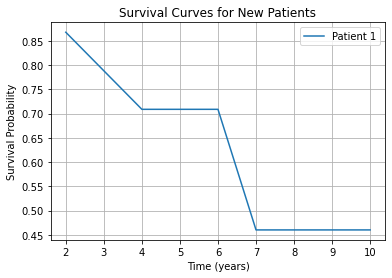

In [4]:

# Predicting survival probability for the new patient
survival_prob = cph.predict_survival_function(new_patient)

# Plotting survival curves for the new patient
for i, (patient_id, survival_curve) in enumerate(survival_prob.items()):
    plt.plot(survival_curve.index.values, survival_curve.values, label=f'Patient {i+1}')

plt.xlabel('Time (years)')
plt.ylabel('Survival Probability')
plt.title('Survival Curves for New Patients')
plt.legend()
plt.grid(True)
plt.show()


-We have a dataset containing information on breast cancer patients, including their age, tumor size, tumor grade, hormone receptor status, survival times, and event indicators.
Each row in the dataset represents a patient, and the columns represent various characteristics and outcomes.

-Problem Statement:
We want to predict the survival probability for a new breast cancer patient based on their characteristics, such as age, tumor size, tumor grade, and hormone receptor status.

-Fitting the Cox Proportional Hazards Model:
We use the provided dataset to fit the Cox Proportional Hazards Model using the lifelines library in Python.
We specify the duration column (Survival_Time) and the event column (Event) to indicate the survival times and event indicators.
We include covariates such as age, tumor size, tumor grade, and hormone receptor status in the model.

-Predicting Survival Probability:
Once the model is fitted, we create a new dataset for the new patient with their characteristics (age, tumor size, tumor grade, and hormone receptor status).

We use the predict_survival_function method of the fitted model to predict the survival probability for the new patient over a specified time period.
This method returns the estimated survival probabilities for each time point.

-Plotting Survival Curves:
We plot the predicted survival curves for the new patient using matplotlib.
Each curve represents the estimated survival probability over time for a specific patient.
The x-axis represents time (in years), and the y-axis represents the survival probability.
We add labels, title, legend, and grid to the plot for better interpretation.

-Interpretation:
The survival curves provide insights into the estimated survival probability for the new patient based on their characteristics.
Clinicians can use this information to assess the patient's prognosis and make informed decisions regarding treatment and care.
Overall, the example demonstrates how the Cox Proportional Hazards Model can be used to predict survival probabilities for individual cancer patients and how to visualize these predictions using survival curves.